In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3308.jpg', 'with_mask_2376.jpg', 'with_mask_2306.jpg', 'with_mask_3236.jpg', 'with_mask_3710.jpg']
['with_mask_3575.jpg', 'with_mask_2011.jpg', 'with_mask_2019.jpg', 'with_mask_2755.jpg', 'with_mask_2830.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2686.jpg', 'without_mask_1595.jpg', 'without_mask_2445.jpg', 'without_mask_1218.jpg', 'without_mask_2349.jpg']
['without_mask_2022.jpg', 'without_mask_2646.jpg', 'without_mask_791.jpg', 'without_mask_2780.jpg', 'without_mask_446.jpg']


In [ ]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images


with mask --> 1

without --> 0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

Displaying the Images

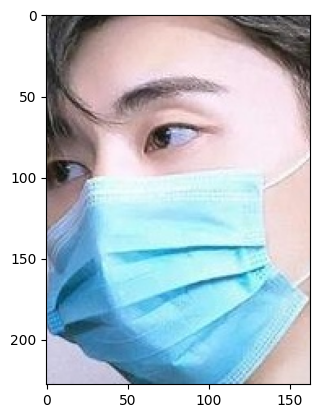

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

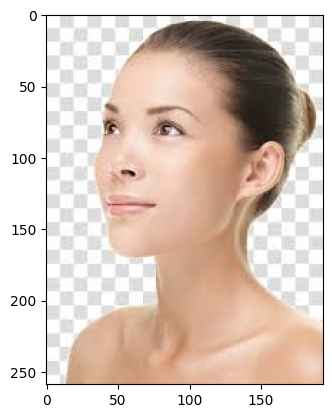

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.Resize the Images

2.Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



  without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 2,  2,  2],
        [ 2,  3,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[16, 19, 28],
        [20, 22, 27],
        [20, 23, 27],
        ...,
        [18, 21, 26],
        [16, 20, 25],
        [17, 20, 25]],

       [[18, 22, 34],
        [19, 22, 27],
        [20, 21, 25],
        ...,
        [16, 19, 23],
        [15, 18, 22],
        [17, 20, 25]],

       [[15, 18, 28],
        [18, 20, 26],
        [20, 21, 25],
        ...,
        [14, 16, 20],
        [18, 20, 26],
        [16, 19, 24]]], dtype=uint8)
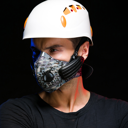

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)
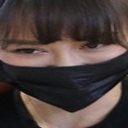

In [ ]:
X_train[0]

Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neaural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 748ms/step - acc: 0.6979 - loss: 0.6068 - val_acc: 0.8893 - val_loss: 0.2571
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 741ms/step - acc: 0.8816 - loss: 0.3013 - val_acc: 0.9091 - val_loss: 0.2473
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 740ms/step - acc: 0.9034 - loss: 0.2286 - val_acc: 0.9124 - val_loss: 0.2402
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 751ms/step - acc: 0.9217 - loss: 0.2035 - val_acc: 0.9207 - val_loss: 0.1937
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 147s 783ms/step - acc: 0.9410 - loss: 0.1574 - val_acc: 0.9107 - val_loss: 0.2128


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - acc: 0.9160 - loss: 0.1905
Test Accuracy =  0.9166114926338196


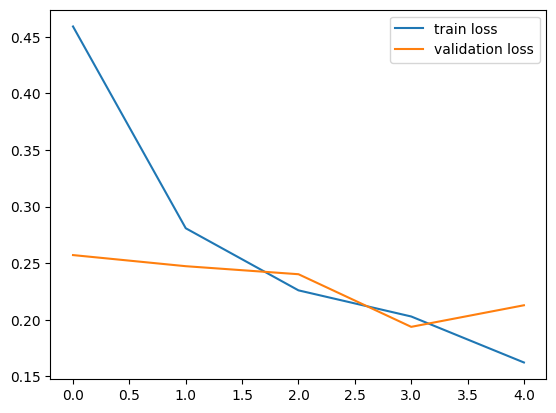

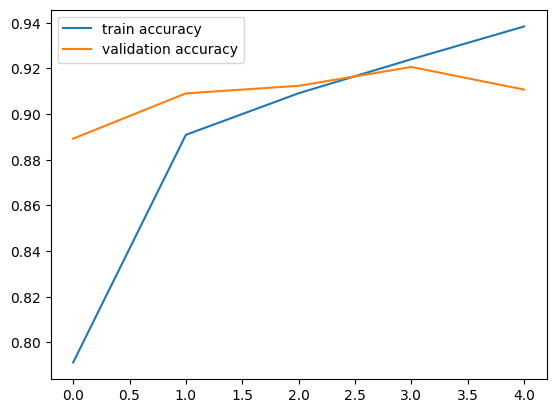

In [ ]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()


Predictive System

Path of the image to be predicted: /content/data/with_mask/indir.jpg


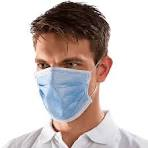

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[0.5590772 0.4729752]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_100.jpg


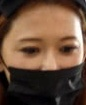

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.23525949 0.8419665 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')